# Training Notebook

In [1]:
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', '$', '#']

In [91]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Training Data
X_train = np.load('data_train.npy').T
t_train = np.load('labels_train.npy')

# Loading Test Data
X_test = np.load('data_test.npy').T
t_test = np.load('labels_test.npy')

print(X_train.shape, t_train.shape)

(6720, 90000) (6720,)


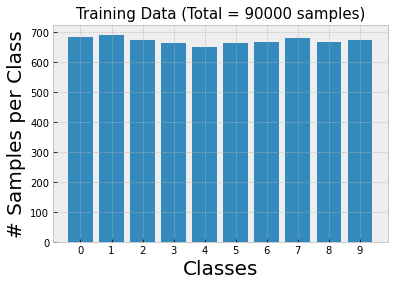

In [4]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

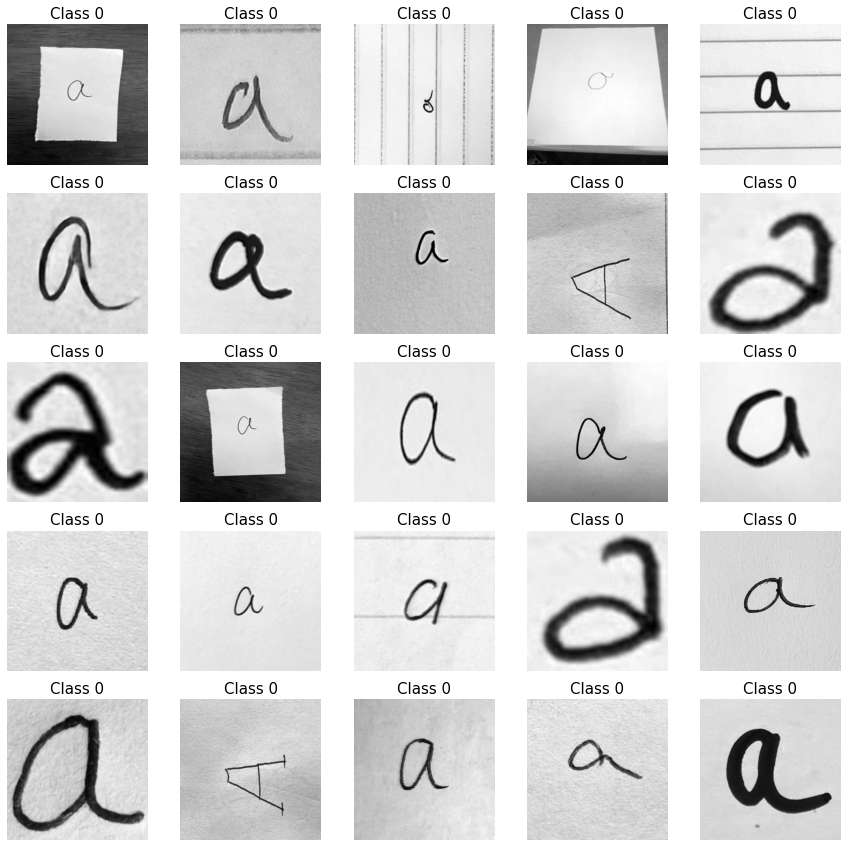

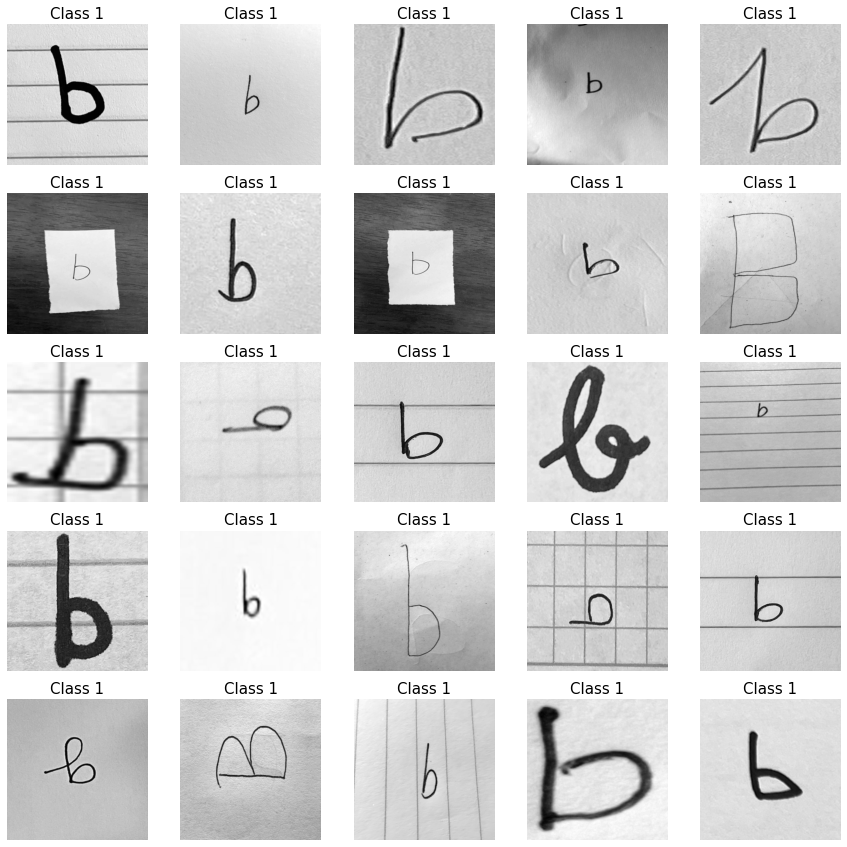

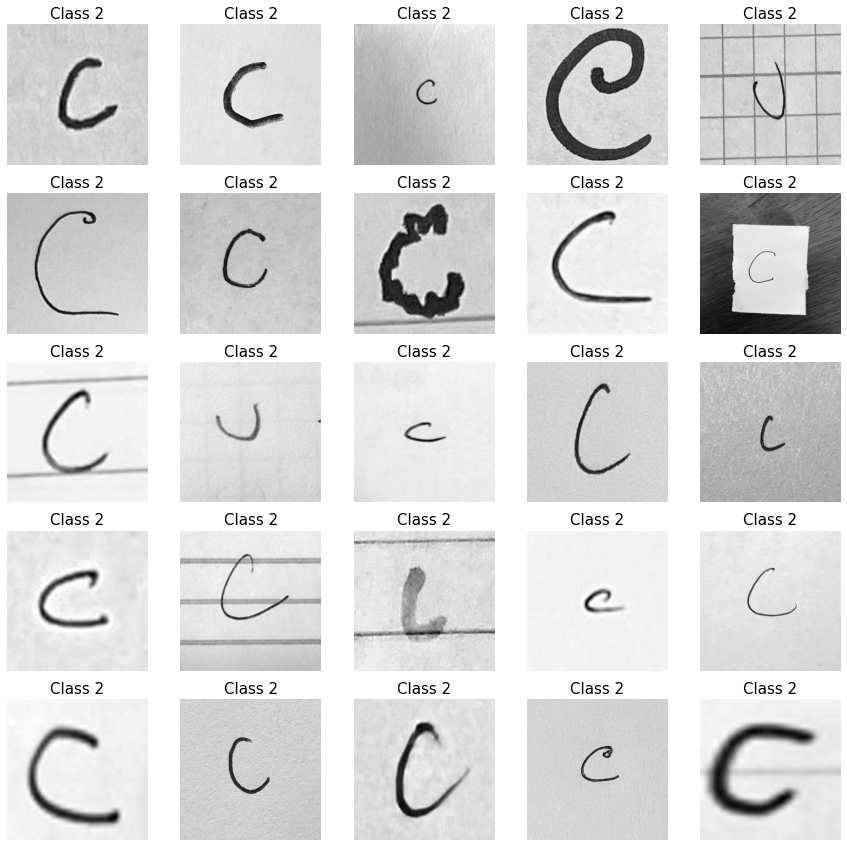

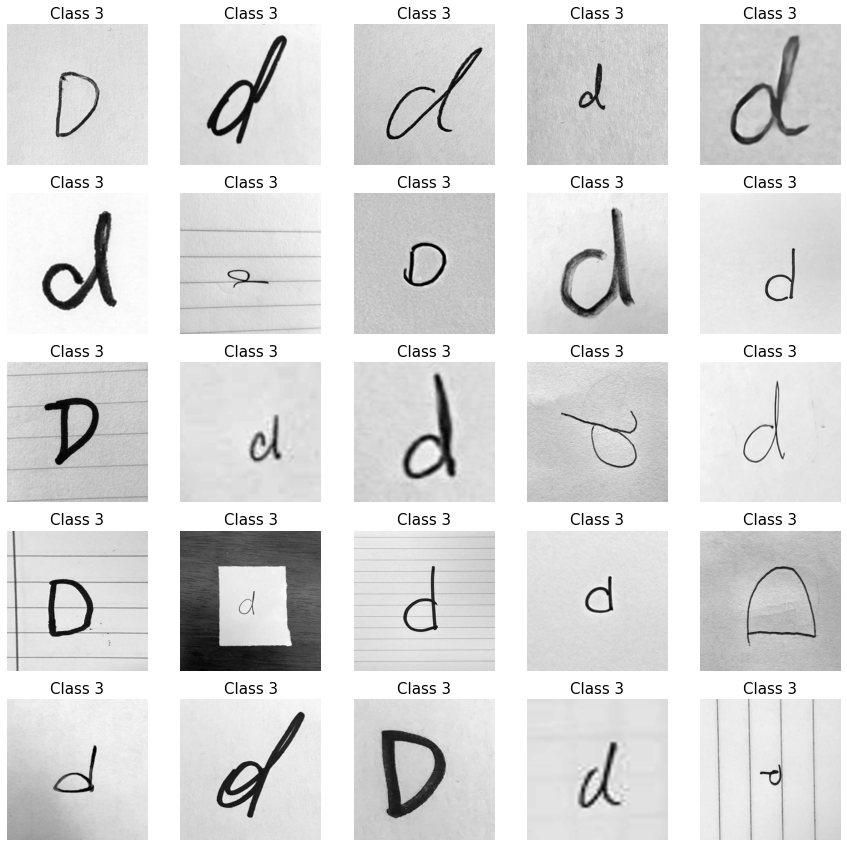

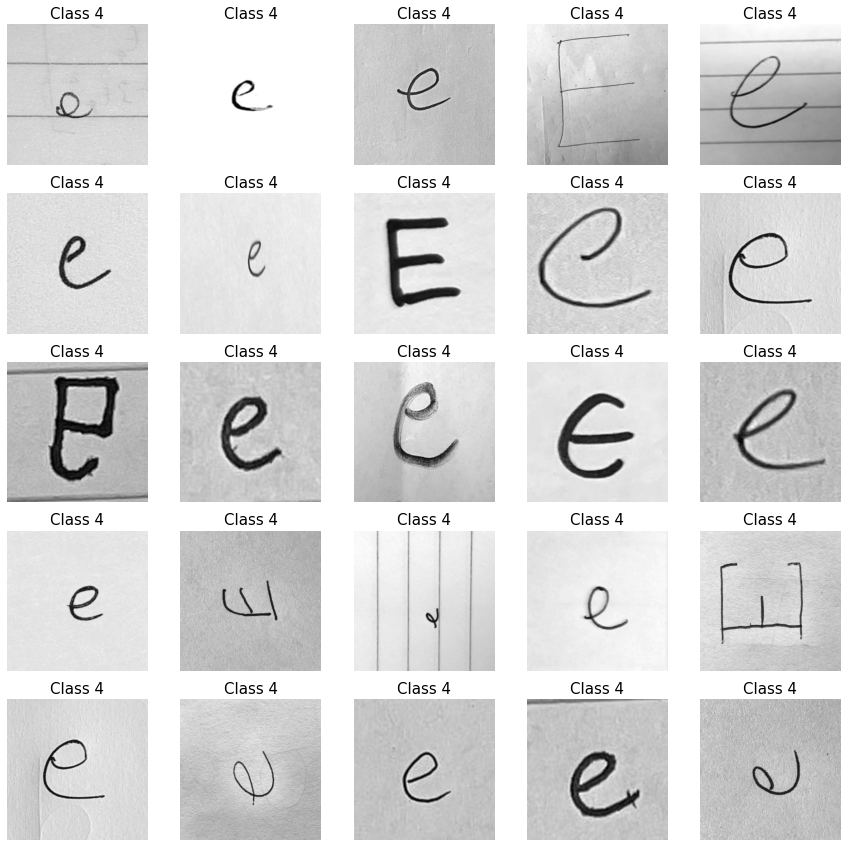

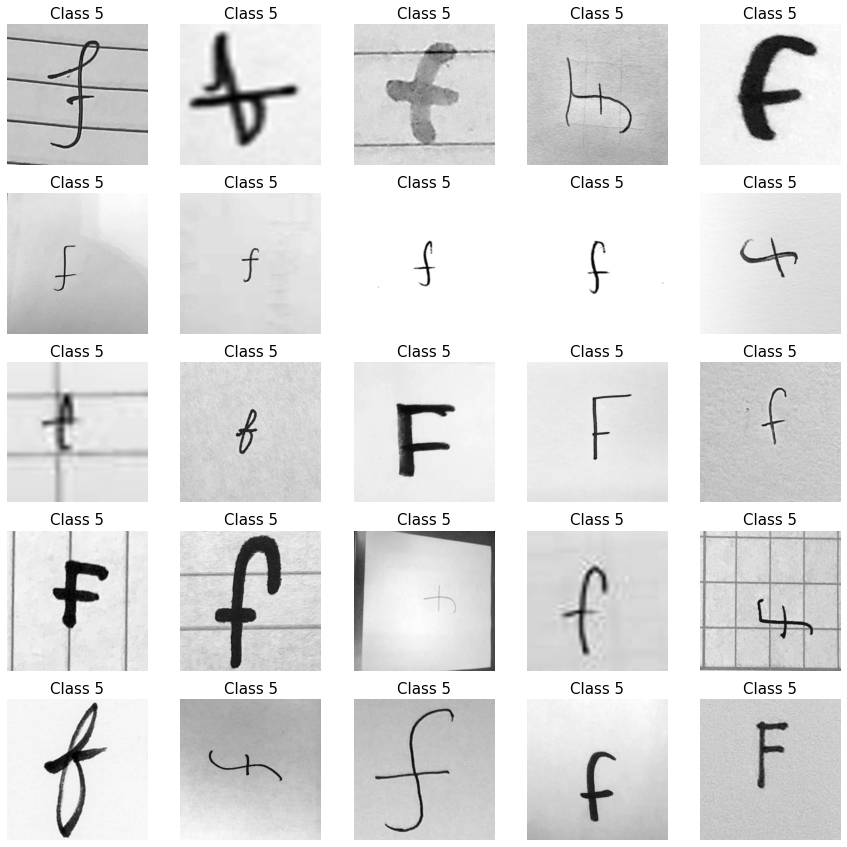

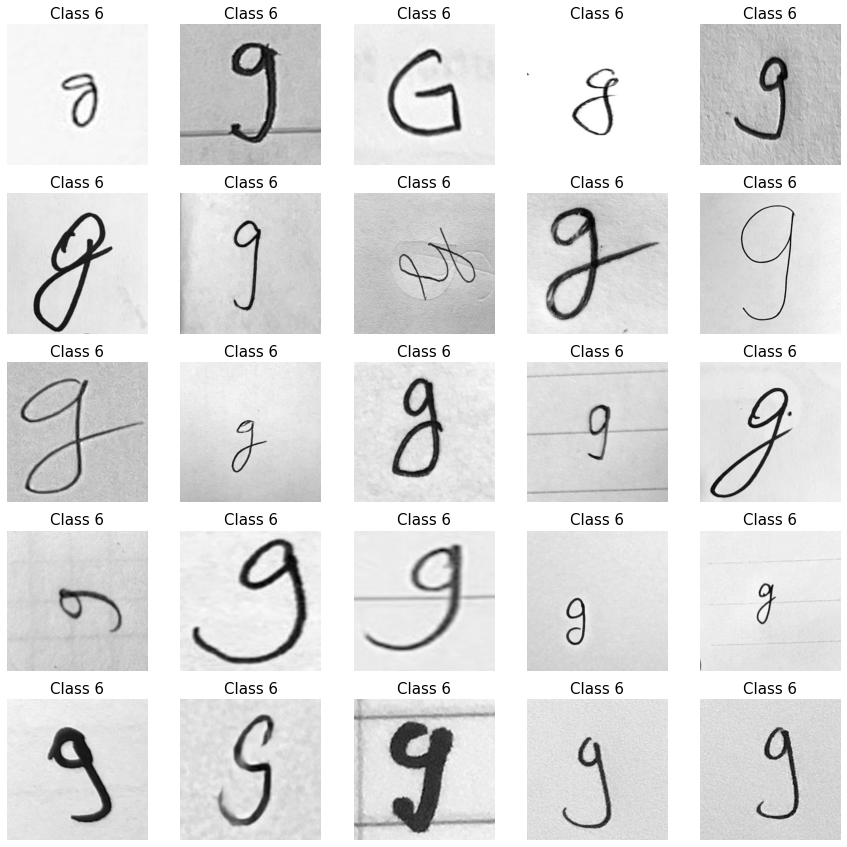

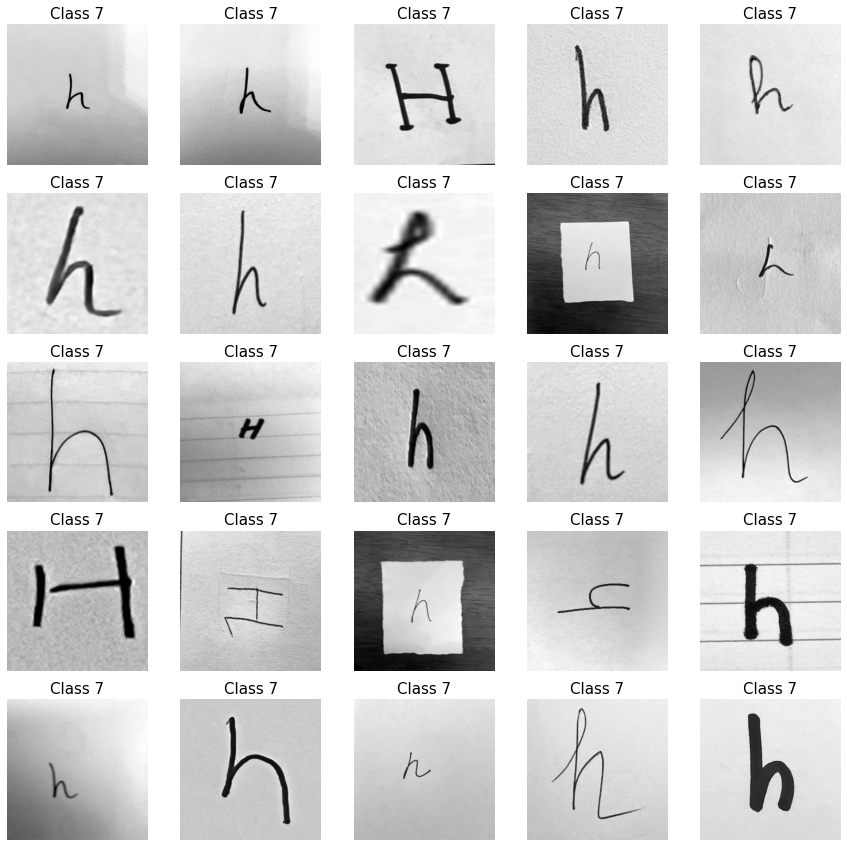

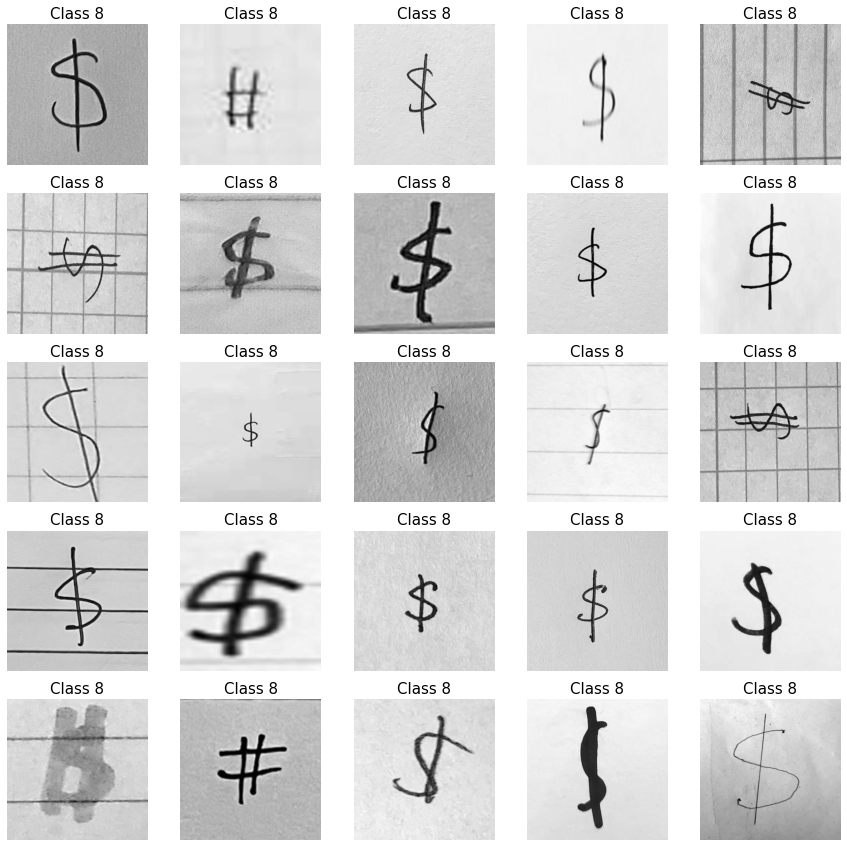

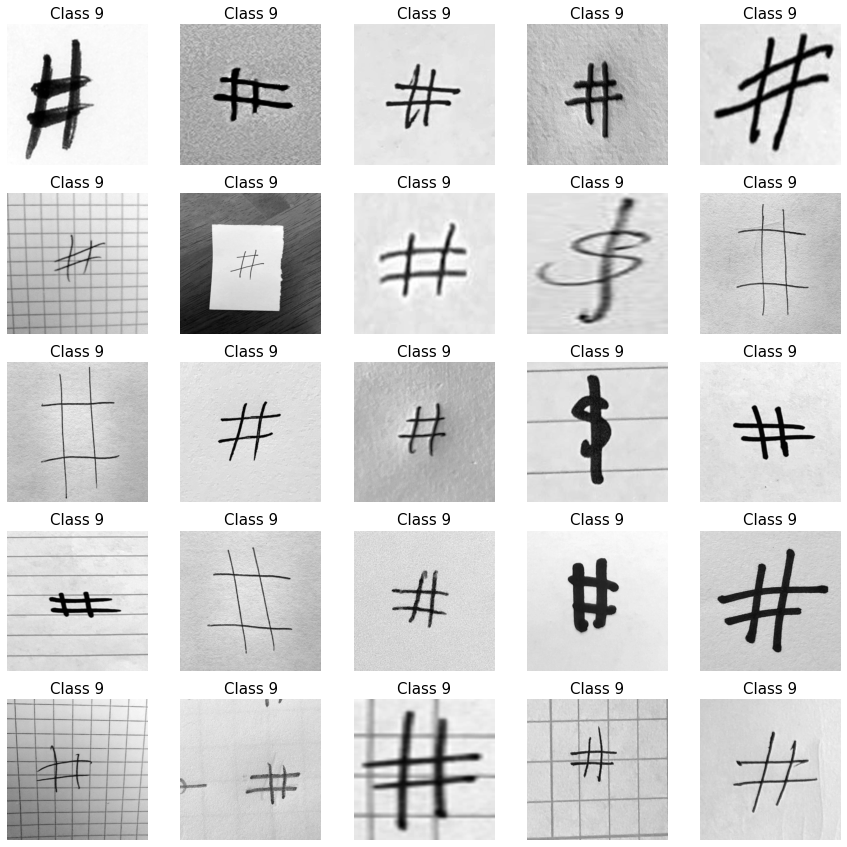

In [5]:
# Displaying some random examples per class

for i in range(0,10):
    rnd_sample = npr.permutation(np.where(t_train==i)[0])
    fig=plt.figure(figsize=(15,15))
    for j in range(25):
        fig.add_subplot(5,5,j+1)
        plt.imshow(X_train[rnd_sample[j],:].reshape((300,300)),cmap='gray')
        plt.axis('off');plt.title('Class '+str(int(t_train[rnd_sample[j]])),size=15)
    plt.show()
    print('\n\n')

## 1. Implement Recursive Feature Elimination (RFE) to select the subset of features. Experiment with at least 2 different estimators. 

    * Identify which pixels are selected and display mask examples from the training dataset.

### Downsample X_train from (300x300) to (50x50). Please note that this downsample will be used for the rest of the project

In [93]:
import cv2
# reshape data 
X = []
for i in range(X_train.shape[0]):
    # reshape training set
    im1 = X_train[i,:].reshape(300,300)
    res = cv2.resize(im1, dsize=(50,50), interpolation=cv2.INTER_CUBIC)
    X.append(res.reshape(2500))

X_train = X
np.shape(X_train)

(6720, 2500)

In [94]:
import cv2
# reshape data 
X = []
for i in range(X_test.shape[0]):
    # reshape training set
    im1 = X_test[i,:].reshape(300,300)
    res = cv2.resize(im1, dsize=(50,50), interpolation=cv2.INTER_CUBIC)
    X.append(res.reshape(2500))

X_test = X
np.shape(X_test)

(2880, 2500)

### RFE with Logistic Regression as an estimator

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 20)
pipe = Pipeline([('scaler', StandardScaler()),
               ('RFE', RFE(estimator=lr, step=10)),
               ('classifier', lr)])
pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFE',
                 RFE(estimator=LogisticRegression(max_iter=20), step=10)),
                ('classifier', LogisticRegression(max_iter=20))])

In [159]:
pipe.fit(X_train, t_train)

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFE',
                 RFE(estimator=LogisticRegression(max_iter=20), step=10)),
                ('classifier', LogisticRegression(max_iter=20))])

In [269]:
print("Selected features information: ")
print(pipe.named_steps['RFE'].support_)
print(pipe.named_steps['RFE'].ranking_)

Selected features information: 
[False False False ... False False False]
[118 116 126 ...  85  82  49]


#### Display which pixels are selected

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_48957/1896186655.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


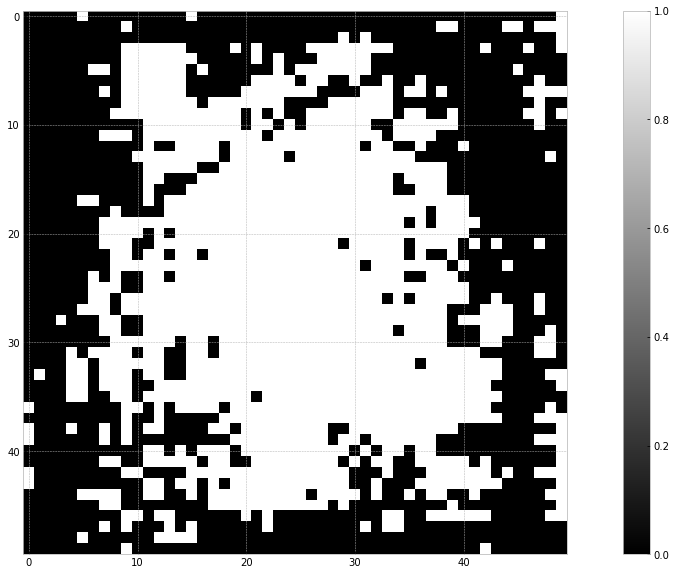

In [287]:
plt.figure(figsize=(20,10))
img = pipe.named_steps['RFE'].support_.reshape(50,50);
plt.imshow(img, cmap='gray')
plt.colorbar();

As we can see, the pixels near the center of the image are selected as important features, whereas the border pixels are disregarded.

#### Display the weight of importance of each pixel

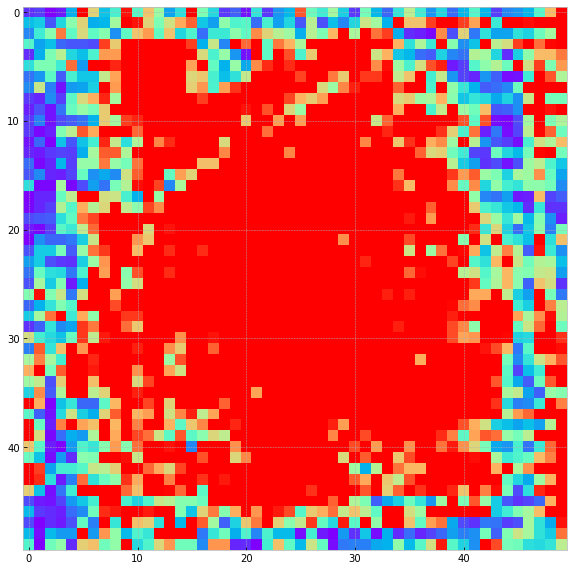

In [286]:
plt.figure(figsize=(20,10))
img = pipe.named_steps['RFE'].ranking_.reshape(50,50);
orig_map = plt.cm.get_cmap(plt.cm.rainbow);
reversed_map = orig_map.reversed();
plt.imshow(img, cmap=reversed_map);

Looking at the plot, we can see that the pixels near the middle had a higher ranking amoung the other pixels, and the ranking starts get lower as you move away from the center.

In [283]:
# Get the indices of the selected pixels
pixel_idx = np.arange(2500);
print("Indices of the selected pixels from RFE: ")
print(pixel_idx[pipe.named_steps['RFE'].support_])

Indices of the selected pixels from RFE: 
[   5   15   49 ... 2415 2459 2492]


In [187]:
# get the best subset of features (pixels)
rfe_support = [pipe.named_steps['RFE'].support_][0]

#Find indicies where features are false in rfe_support to remove
index = []
for i in range(2500):
    #append index where removed features are 
    if(rfe_support[i]==False):
        index.append(i)

#Create a subset training set with only the selected pixels
X_train_M1 = np.delete(X_train, index, 1)
X_train_M1.shape

(6720, 1250)

In [340]:
import joblib
# Save preprocessing pipeline for Part 1 Model 1
joblib.dump(pipe, 'pipe_Q1_M1');
# Save the list of pixels that are selected from RFE(binary mask)
joblib.dump(pipe.named_steps['RFE'].support_, 'binary_mask_Q1_M1');
# Save the list of pixels ranked from RFE
joblib.dump(pipe.named_steps['RFE'].ranking_, 'ranking_Q1_M1');

As we can see, only features (or pixels) out of 2500 were selected.

In [236]:
# Correlation matrix of selected pixels
import pandas as pd
data = pd.DataFrame(X_train_M1)
corr = data.corr(method='pearson')
corr

0         1         2         3         4         5         6     \
0     1.000000  0.957510  0.880721  0.939535  0.884156  0.881808  0.878787   
1     0.957510  1.000000  0.901195  0.942190  0.904072  0.901956  0.899287   
2     0.880721  0.901195  1.000000  0.882491  0.909956  0.909985  0.912580   
3     0.939535  0.942190  0.882491  1.000000  0.910731  0.908664  0.901778   
4     0.884156  0.904072  0.909956  0.910731  1.000000  0.983119  0.966376   
...        ...       ...       ...       ...       ...       ...       ...   
1245  0.809870  0.804849  0.750689  0.809413  0.771609  0.770834  0.762684   
1246  0.809492  0.807472  0.750332  0.808183  0.771377  0.770494  0.761690   
1247  0.808213  0.807173  0.751116  0.806740  0.772442  0.771265  0.762347   
1248  0.816884  0.809154  0.754548  0.810405  0.765414  0.764278  0.755694   
1249  0.808416  0.817010  0.803522  0.804257  0.815058  0.815037  0.810337   

          7         8         9     ...      1240      1241      1242  \
0     0.885379  0.888787  0.884194  ...  0.783717  0.785162  0.789490   
1     0.904814  0.904865  0.899660  ...  0.790918  0.793456  0.798542   
2     0.921872  0.940560  0.941515  ...  0.753552  0.762702  0.768252   
3     0.903153  0.894749  0.888104  ...  0.789129  0.791068  0.795918   
4     0.962884  0.942501  0.935328  ...  0.784243  0.793188  0.800684   
...        ...       ...       ...  ...       ...       ...       ...   
1245  0.768919  0.776096  0.772977  ...  0.910184  0.909957  0.913956   
1246  0.768975  0.775996  0.773244  ...  0.910915  0.911590  0.914726   
1247  0.769544  0.776133  0.773129  ...  0.913596  0.912740  0.915413   
1248  0.763766  0.775164  0.772572  ...  0.902475  0.902868  0.905199   
1249  0.817518  0.825206  0.821613  ...  0.905853  0.912440  0.918872   

          1243      1244      1245      1246      1247      1248      1249  
0     0.819924  0.809200  0.809870  0.809492  0.808213  0.816884  0.808416  
1     0.807521  0.804141  0.804849  0.807472  0.807173  0.809154  0.817010  
2     0.748560  0.748467  0.750689  0.750332  0.751116  0.754548  0.803522  
3     0.813361  0.808046  0.809413  0.808183  0.806740  0.810405  0.804257  
4     0.768464  0.769084  0.771609  0.771377  0.772442  0.765414  0.815058  
...        ...       ...       ...       ...       ...       ...       ...  
1245  0.972511  0.987342  1.000000  0.985849  0.976692  0.962616  0.919415  
1246  0.969937  0.981480  0.985849  1.000000  0.983043  0.960575  0.919097  
1247  0.966666  0.973335  0.976692  0.983043  1.000000  0.955791  0.918487  
1248  0.968633  0.962618  0.962616  0.960575  0.955791  1.000000  0.931058  
1249  0.915263  0.917207  0.919415  0.919097  0.918487  0.931058  1.000000  

[1250 rows x 1250 columns]

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_48957/2724229713.py:3: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


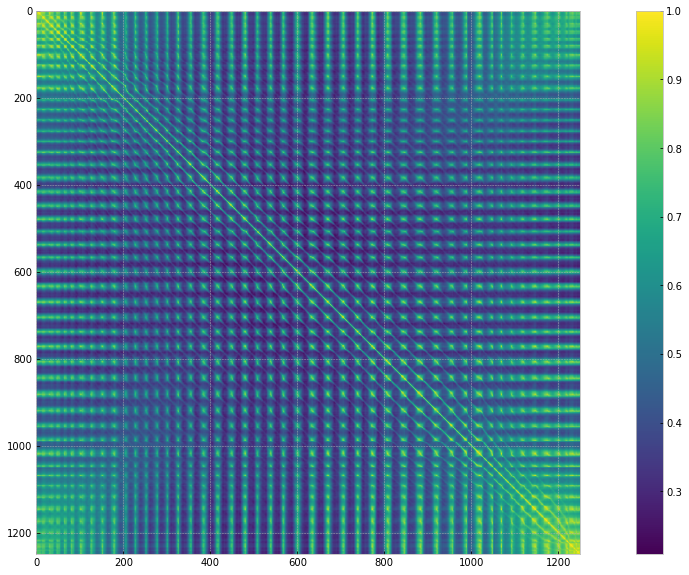

In [272]:
# Display confusion matrix
plt.figure(figsize=(20,10))
plt.imshow(corr.abs(), cmap='viridis')
plt.colorbar();

Using the confusion matrix, we are able to see which pixels are likely to be confused by the logistic regression classifier. 

#### Evaluate performce for RFE with logistic regression as the estimator

In [297]:
print("RFE with Logistic Regression score:")
print(pipe.score(X_train,t_train)*100)

RFE with Logistic Regression score:
50.416666666666664


In [306]:
from sklearn.metrics import classification_report
y_train = pipe.predict(X_train)
print('\n\nTraining Set Performance')
print('Accuracy Score:', pipe.score(X_train,t_train)*100,'%') 
print('Performance Report: ')
print(classification_report(t_train,y_train))
print('\n\n')




Training Set Performance
Accuracy Score: 50.416666666666664 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       685
         1.0       0.46      0.47      0.46       690
         2.0       0.51      0.62      0.56       673
         3.0       0.51      0.51      0.51       665
         4.0       0.47      0.49      0.48       651
         5.0       0.52      0.44      0.48       663
         6.0       0.53      0.53      0.53       669
         7.0       0.42      0.58      0.49       682
         8.0       0.55      0.40      0.46       668
         9.0       0.61      0.50      0.55       674

    accuracy                           0.50      6720
   macro avg       0.51      0.50      0.50      6720
weighted avg       0.51      0.50      0.50      6720






### RFE with Decision Tree as an estimator

In [324]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=40, min_samples_leaf=10)
pipe2 = Pipeline([('scaler', StandardScaler()),
               ('RFE', RFE(estimator=dt, step=20)),
               ('classifier', dt)])
pipe2

Pipeline(steps=[('scaler', StandardScaler()),
                ('RFE',
                 RFE(estimator=DecisionTreeClassifier(max_depth=40,
                                                      min_samples_leaf=10),
                     step=20)),
                ('classifier',
                 DecisionTreeClassifier(max_depth=40, min_samples_leaf=10))])

In [325]:
pipe2.fit(X_train, t_train);

In [326]:
pipe2.score(X_train, t_train)

0.5839285714285715

In [327]:
print("Selected features information: ")
print(pipe2.named_steps['RFE'].support_)
print(pipe2.named_steps['RFE'].ranking_)

Selected features information: 
[ True  True  True ... False False False]
[ 1  1  1 ... 52 57 62]


#### Display which pixels are selected

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_48957/255935344.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


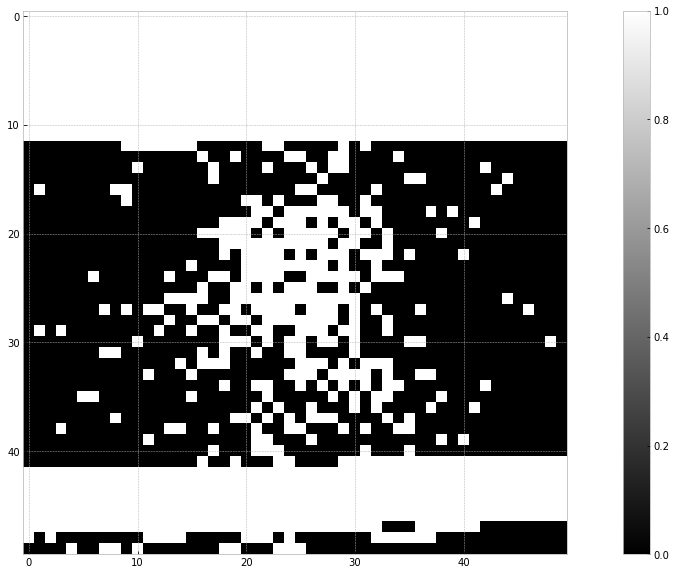

In [328]:
plt.figure(figsize=(20,10))
img = pipe2.named_steps['RFE'].support_.reshape(50,50);
plt.imshow(img, cmap='gray')
plt.colorbar();

As we can see, the pixels near the center of the image are selected along with the upper and mid lower section of the image as important features.

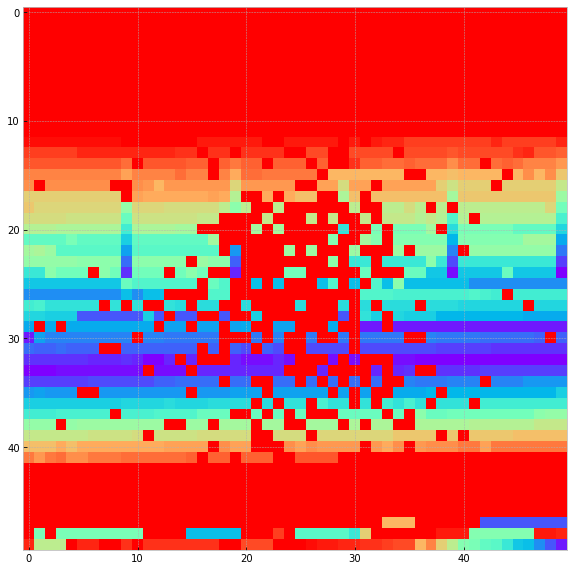

In [330]:
plt.figure(figsize=(20,10))
img = pipe2.named_steps['RFE'].ranking_.reshape(50,50);
orig_map = plt.cm.get_cmap(plt.cm.rainbow);
reversed_map = orig_map.reversed();
plt.imshow(img, cmap=reversed_map);

Looking at the plot, we can see that the pixels near the middle, above and below had a higher ranking amoung the other pixels, and the ranking starts get lower as you move away from the center.

In [331]:
# Get the indices of the selected pixels
pixel_idx = np.arange(2500);
print("Indices of the selected pixels from RFE: ")
print(pixel_idx[pipe2.named_steps['RFE'].support_])

Indices of the selected pixels from RFE: 
[   0    1    2 ... 2473 2474 2475]


In [334]:
# get the best subset of features (pixels)
rfe_support = [pipe2.named_steps['RFE'].support_][0]

#Find indicies where features are false in rfe_support to remove
index = []
for i in range(2500):
    #append index where removed features are 
    if(rfe_support[i]==False):
        index.append(i)

#Create a subset training set with only the selected pixels
X_train_M2 = np.delete(X_train, index, 1)
X_train_M2.shape

(6720, 1250)

In [342]:
# Save preprocessing pipeline for Part 1 Model 2
joblib.dump(pipe2, 'pipe_Q1_M2');
# Save the list of pixels that are selected from RFE(binary mask)
joblib.dump(pipe2.named_steps['RFE'].support_, 'binary_mask_Q1_M2');
# Save the list of pixels ranked from RFE
joblib.dump(pipe2.named_steps['RFE'].ranking_, 'ranking_Q1_M2');

In [336]:
# Correlation matrix of selected pixels
data = pd.DataFrame(X_train_M2)
corr = data.corr(method='pearson')
corr

0         1         2         3         4         5         6     \
0     1.000000  0.973172  0.963884  0.959456  0.955241  0.947325  0.946680   
1     0.973172  1.000000  0.973703  0.968911  0.965773  0.957504  0.956800   
2     0.963884  0.973703  1.000000  0.974667  0.972203  0.964198  0.964216   
3     0.959456  0.968911  0.974667  1.000000  0.980487  0.971376  0.971054   
4     0.955241  0.965773  0.972203  0.980487  1.000000  0.980174  0.979023   
...        ...       ...       ...       ...       ...       ...       ...   
1245  0.792258  0.800796  0.804155  0.808066  0.814539  0.814352  0.819606   
1246  0.793820  0.801585  0.804440  0.807560  0.813659  0.813694  0.817739   
1247  0.797342  0.803212  0.805834  0.807200  0.811215  0.808820  0.813804   
1248  0.797022  0.802192  0.804656  0.805919  0.811288  0.808161  0.812609   
1249  0.798214  0.803694  0.805972  0.808093  0.813631  0.810634  0.814945   

          7         8         9     ...      1240      1241      1242  \
0     0.941080  0.940713  0.940772  ...  0.790926  0.798679  0.792355   
1     0.952532  0.952503  0.951526  ...  0.796143  0.805659  0.800185   
2     0.958719  0.959027  0.958066  ...  0.799100  0.809020  0.804860   
3     0.965980  0.966006  0.964825  ...  0.803256  0.813901  0.809209   
4     0.973663  0.974421  0.972213  ...  0.807628  0.821346  0.815685   
...        ...       ...       ...  ...       ...       ...       ...   
1245  0.817975  0.816683  0.817530  ...  0.942134  0.968848  0.973245   
1246  0.816773  0.818257  0.817455  ...  0.944299  0.967193  0.972367   
1247  0.810611  0.811959  0.812337  ...  0.944573  0.955485  0.959513   
1248  0.810055  0.811718  0.811867  ...  0.948658  0.954984  0.957039   
1249  0.812360  0.813411  0.814430  ...  0.953094  0.954267  0.956839   

          1243      1244      1245      1246      1247      1248      1249  
0     0.792348  0.794921  0.792258  0.793820  0.797342  0.797022  0.798214  
1     0.800661  0.802316  0.800796  0.801585  0.803212  0.802192  0.803694  
2     0.804340  0.806934  0.804155  0.804440  0.805834  0.804656  0.805972  
3     0.809234  0.811317  0.808066  0.807560  0.807200  0.805919  0.808093  
4     0.816310  0.817991  0.814539  0.813659  0.811215  0.811288  0.813631  
...        ...       ...       ...       ...       ...       ...       ...  
1245  0.973540  0.978323  1.000000  0.986579  0.973641  0.972278  0.972583  
1246  0.974000  0.977346  0.986579  1.000000  0.977206  0.975463  0.975509  
1247  0.960362  0.965694  0.973641  0.977206  1.000000  0.986267  0.982771  
1248  0.959159  0.963684  0.972278  0.975463  0.986267  1.000000  0.985786  
1249  0.959064  0.963583  0.972583  0.975509  0.982771  0.985786  1.000000  

[1250 rows x 1250 columns]

/var/folders/1_/2tjx84411dl0n9rvnrjdns8c0000gn/T/ipykernel_48957/2713595052.py:4: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


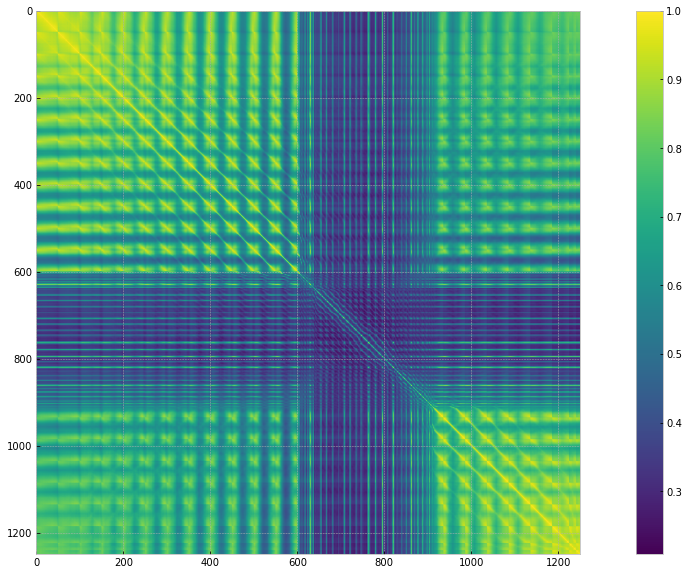

In [337]:
# Display confusion matrix
plt.figure(figsize=(20,10))
plt.imshow(corr.abs(), cmap='viridis')
plt.colorbar();

Using the confusion matrix, we are able to see which pixels are likely to be confused by the decision tree classifier, which we can see is in quite a lot of places

#### Evaluate performce for RFE with decision tree classifier as the estimator

In [338]:
print("RFE with Decision Tree score:")
print(pipe2.score(X_train,t_train)*100)

RFE with Decision Tree score:
58.392857142857146


In [339]:
y_train2 = pipe2.predict(X_train)
print('\n\nTraining Set Performance')
print('Accuracy Score:', pipe2.score(X_train,t_train)*100,'%') 
print('Performance Report: ')
print(classification_report(t_train,y_train2))
print('\n\n')



Training Set Performance
Accuracy Score: 58.392857142857146 %
Performance Report: 
              precision    recall  f1-score   support

         0.0       0.54      0.59      0.56       685
         1.0       0.53      0.61      0.57       690
         2.0       0.70      0.73      0.71       673
         3.0       0.53      0.55      0.54       665
         4.0       0.58      0.59      0.58       651
         5.0       0.59      0.56      0.58       663
         6.0       0.57      0.53      0.55       669
         7.0       0.59      0.54      0.56       682
         8.0       0.63      0.57      0.60       668
         9.0       0.62      0.56      0.59       674

    accuracy                           0.58      6720
   macro avg       0.59      0.58      0.58      6720
weighted avg       0.59      0.58      0.58      6720






Based on the Accuracy and precision score, performing RFE with a Decision Tree Classifier as the estimator is preffered over RFE with Logistic Regression as the estimator. However, the pixels selected for RFE with Logistic Regression return more accurate results on where the labels are placed. So I would choose RFE with logistic regression since it would perform better in test sets.

## 2. Implement Principal Component Analysis (PCA) to select the number of components that explain at least 90% of the explained variance. Train a classifier on the original dataset and the reduced dataset.
    * Was training faster using the reduced dataset?
    * Compare performances.
    * Visualize the top 10 eigenvectors. Discuss what they represent.
    * Visualize examples of image reconstruction from PCA projections.

#### Train classifier on original dataset

In [356]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2500)
pca.fit(X_train)

PCA(n_components=2500)

In [351]:
# Get features that explain at least 90% of the explained variance
print("Number of Components that explain at least 90% of the explained variance:")
print(np.where(np.cumsum(pca.explained_variance_ratio_)>=0.9)[0][0])

Number of Components that explain at least 90% of the explained variance:
185


So in order to preserve 90% of the explained variance in the data, we need to extract 182 principal components.

#### Visualize top 10 eigenvectors

<Figure size 720x720 with 0 Axes>

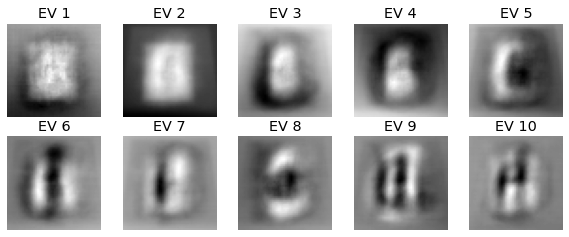

In [369]:
plt.figure(figsize=(10,10));
fig=plt.figure(figsize=(10,10));
for i in range(10):
    fig.add_subplot(5,5,i+1);
    plt.imshow(pca.components_[i,:].reshape((50,50)), cmap='gray');
    plt.title('EV '+str(i+1));
    plt.axis('off');

Based on this data, each eigenvector(EV) is representing a different amount of variance, where EV 1 has the most variance and EV 10 has the least variance out of the top 10 eigenvectors. The more variance means it has more feature importance.

For EV 1, it is apparent that the pixels in the center block, where the characters are mainly centered, have more variance compared to EV 10 where only a a few sections have variance.

#### Visualize examples of image reconstruction from PCA projections

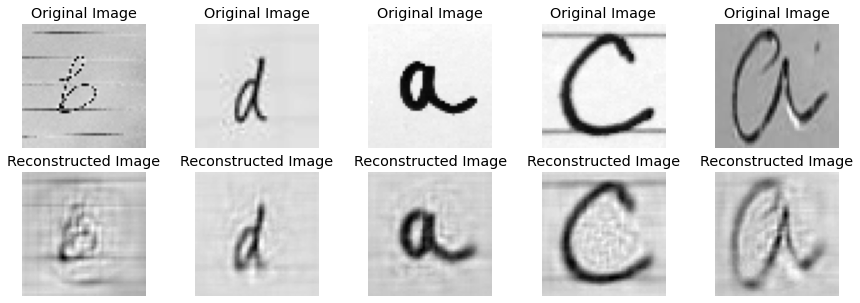

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
# reconstruct images in the original dataset 
pca_r = PCA(n_components=185)
y_pca = pca_r.fit_transform(X_train_s)
# bring back the original scaling by multiplying by the standard deviation
# and adding the sample mean
X_reconstruct = pca_r.inverse_transform(y_pca)
X_reconstructed = scaler.inverse_transform(X_reconstruct)
N=5
fig = plt.figure(figsize=(15,5))
idx = np.random.choice(range(X_reconstructed.shape[0]),replace=False,size=N)
j=1
for i in range(N):
    fig.add_subplot(2,N,j)
    plt.imshow(X_train[idx[i]].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Original Image');
    fig.add_subplot(2,N,j+N)
    plt.imshow(X_reconstructed[idx[i],:].reshape(50,50), cmap='gray')
    plt.axis('off')
    plt.title('Reconstructed Image');
    j+=1
    

#### Train classifier (SVM with RBF) on the original dataset

In [24]:
# Train a classifier on the original dataset
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe_p2_M1 = Pipeline(steps=[('scaler', StandardScaler()),
                      ('SVM', SVC(kernel='rbf', class_weight='balanced'))])
pipe_p2_M1

Pipeline(steps=[('scaler', StandardScaler()),
                ('SVM', SVC(class_weight='balanced'))])

In [25]:
from time import time
t0 = time()
pipe_p2_M1.fit(X_train, t_train)
t1 = time()

In [26]:
pipe_p2_M1.score(X_train, t_train)

0.6202380952380953

In [27]:
print("Classifier SVM time on original dataset: %.2g sec" % (t1 - t0))

Classifier SVM time on original dataset: 67 sec


In [45]:
# Predict the labels for the train data and measure the time for
# classifier on original dataset (no PCA)
t0 = time()
y_train1 = pipe_p2_M1.predict(X_train)
t1 = time()

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from time import time
print("Training with no PCA Time: %.2g sec " % (t1-t0))
print('Accuracy in Training:', accuracy_score(t_train, y_train1)*100,'%\n')
print('Performance Report: ')
print(classification_report(t_train,y_train1))
print('\n\n')

Training with no PCA Time: 43 sec 
Accuracy in Training: 62.023809523809526 %

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.60      0.66      0.63       685
         1.0       0.62      0.59      0.61       690
         2.0       0.45      0.80      0.57       673
         3.0       0.71      0.61      0.66       665
         4.0       0.74      0.56      0.64       651
         5.0       0.58      0.63      0.60       663
         6.0       0.74      0.64      0.69       669
         7.0       0.57      0.57      0.57       682
         8.0       0.73      0.53      0.61       668
         9.0       0.71      0.61      0.65       674

    accuracy                           0.62      6720
   macro avg       0.65      0.62      0.62      6720
weighted avg       0.64      0.62      0.62      6720






#### Train classifier (SVM with RBF) on the reduced dataset (PCA)

In [37]:
# Train a classifier on the reduced dataset

pipe_p2_M2 = Pipeline(steps=[('scaler', StandardScaler()),
                      ('PCA', PCA(n_components=185)),
                      ('SVM', SVC(kernel='rbf', class_weight='balanced'))])
pipe_p2_M2

Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=185)),
                ('SVM', SVC(class_weight='balanced'))])

In [38]:
t0 = time()
pipe_p2_M2.fit(X_train, t_train)
t1 = time()

In [39]:
pipe_p2_M2.score(X_train, t_train)

0.5566964285714285

In [40]:
print("PCA with SVM time on reduced dataset: %.2g sec" % (t1 - t0))

PCA with SVM time on reduced dataset: 9.2 sec


In [50]:
# Predict the labels for the train data and measure the time for
# classifier on original dataset (no PCA)
t0 = time()
y_train2 = pipe_p2_M2.predict(X_train)
t1 = time()

In [51]:
print("Training with no PCA Time: %.2g sec " % (t1-t0))
print('Accuracy in Training:', accuracy_score(t_train, y_train2)*100,'%\n')
print('Performance Report: ')
print(classification_report(t_train,y_train2))
print('\n\n')

Training with no PCA Time: 7.9 sec 
Accuracy in Training: 55.669642857142854 %

Performance Report: 
              precision    recall  f1-score   support

         0.0       0.53      0.59      0.56       685
         1.0       0.53      0.52      0.53       690
         2.0       0.42      0.76      0.54       673
         3.0       0.66      0.55      0.60       665
         4.0       0.66      0.48      0.56       651
         5.0       0.53      0.57      0.55       663
         6.0       0.64      0.57      0.60       669
         7.0       0.53      0.50      0.51       682
         8.0       0.64      0.48      0.54       668
         9.0       0.65      0.55      0.60       674

    accuracy                           0.56      6720
   macro avg       0.58      0.56      0.56      6720
weighted avg       0.58      0.56      0.56      6720






Looking at the results, training a classifier on the reduced dataset with SVM and PCA took a shorter amount of time to train and predict the labels, but it had a lower accuracy. In the original dataset, the accuracy score was greater than the reduced dataset by about 7%, but it took a significant amount of time to perform.

In [52]:
import joblib
# Save preprocessing pipeline for Part 2 Model 1
joblib.dump(pipe_p2_M1, 'pipe_Q2_nPCA');
# Save preprocessing pipeline for Part 2 Model 2
joblib.dump(pipe_p2_M2, 'pipe_Q2_PCA');

## 4. Implement at least 3 manifold learning algorithms for reducing the dimensionality of the feature space. Utilize the new lower-dimensional feature space to build a classifier.

    * Which manifold learning algorithm would you select?
    
    * Visualize and interpret what the first 2 dimensions in the manifold learning algorithm you train.

In [164]:
from matplotlib import offsetbox
def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(6720):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            rnd_sample = npr.permutation(np.where(t_train==0)[0])
            #plt.imshow(X_train[rnd_sample[j],:].reshape((300,300)),cmap='gray')
            if(i>684):
                index = 684;
            else:
                index=i
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[rnd_sample[index]].reshape(50,50), cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

### Part 1: Reduce dimensionality of feature space using ISOMAP

In [79]:
isomap2 = Isomap(n_components=2)
# fit the data and transform it so we have 2 dimensions instead of 2500
proj_iso_2 = isomap2.fit_transform(X_train)

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

In [78]:
from sklearn.manifold import Isomap
isomap = Isomap(n_components=8)
# fit the data and transform it so we have 8 dimensions instead of 2500
proj_iso_8 = isomap.fit_transform(X_train)

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

In [95]:
isomap3 = Isomap(n_components=1250)
# fit the data and transform it so we have 1250 dimensions instead of 2500
proj_iso_1250 = isomap3.fit_transform(X_train)
proj_iso_1250_test = isomap3.fit_transform(X_test)

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

#### Build classifier using new lower dimensional space (ISOMAP)

In [71]:
# Build classifier using new lower dimensional spcae
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
pipe_iso = Pipeline([('scaler', StandardScaler()),
               ('classifier', lr)])
pipe_iso

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

#### Compare isomap performance of different dimensions

In [86]:
print("Accuracy score for Classifier on 2 dimensions: ")
pipe_iso.fit(proj_iso_2, t_train)
pipe_iso.named_steps['classifier'].score(proj_iso_2,t_train)

Accuracy score for Classifier on 2 dimensions: 


0.11264880952380953

In [87]:
print("Accuracy score for Classifier on 8 dimensions: ")
pipe_iso.fit(proj_iso_8, t_train)
pipe_iso.named_steps['classifier'].score(proj_iso_8,t_train)

Accuracy score for Classifier on 8 dimensions: 


0.13452380952380952

In [89]:
print("Accuracy score for Classifier on 1250 dimensions: ")
pipe_iso.fit(proj_iso_1250, t_train)
pipe_iso.named_steps['classifier'].score(proj_iso_1250,t_train)

Accuracy score for Classifier on 1250 dimensions: 


/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3099702380952381

Based on these results, I would reduce the dimensions to 1250 using ISOMAP and classify it using logistic regression

In [97]:
import joblib
# Save reduced dimensional test set with isomap n_components=1250
joblib.dump(proj_iso_1250_test, 'proj_1250_test_Q4');
# Save preprocessing pipeline for Part 4 ISOMAP
joblib.dump(pipe_iso, 'pipe_Q4_iso');

#### Visualize first 2 dimensions of ISOMAP with 1250 dimensions

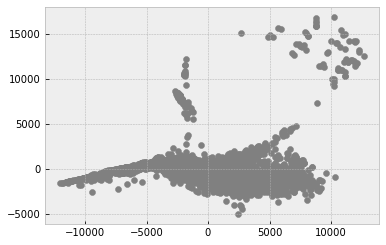

In [168]:
plt.scatter(proj_iso_1250[:,[0]], proj_iso_1250[:,1], c='gray', cmap=plt.cm.Spectral);

/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 3 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/Users/diana/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row

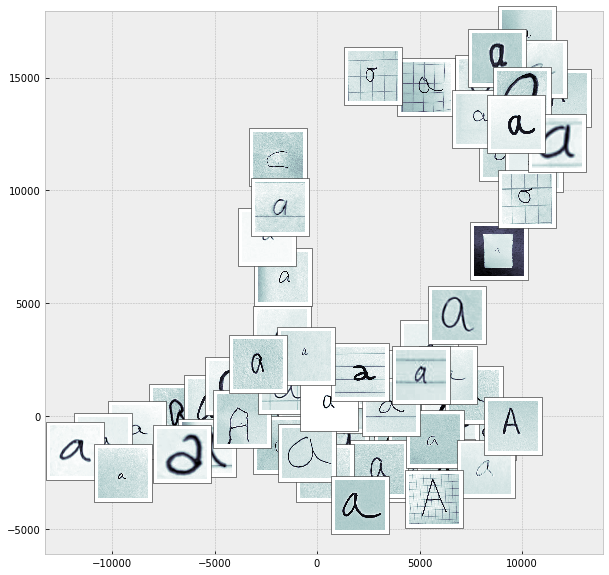

In [169]:
fig, ax = plt.subplots(figsize=(10,10))
model_ISOMAP = Isomap(n_components=2)
plot_components(X_train, model_ISOMAP, images=X_train,
               ax=ax, thumb_frac=0.05,cmap='bone')

Looking at the first two dimensions, the data is a bit space and not perfectly unfolded, but we are able to see the relationship between points. Along the x axis, the characters range from size and orientation. As we move further to the right, the characters are getting larger and turned at a 90 degree angle. Also the lines on the paper are more apparent. Along the y axis, the characters change orientation from top to bottom and the thickness of the characters increase as you move downwards. This shows that the orientation, background, and thinkness of the characters are what carry high variance for ISOMAP.

### Part 2: Reduce dimensionality of feature space using LLE

In [105]:
from sklearn.manifold import LocallyLinearEmbedding as LLE
lle_2 = LLE(n_components=2)
proj_lle2 = lle_2.fit_transform(X_train)
proj_lle2.shape

(6720, 2)

In [110]:
lle_10 = LLE(n_components=10)
proj_lle10 = lle_10.fit_transform(X_train)
proj_lle10.shape

(6720, 10)

In [120]:
lle_1250 = LLE(n_components=1250)
proj_lle1250 = lle_1250.fit_transform(X_train)
proj_lle_1250_test = lle_1250.fit_transform(X_test)
proj_lle1250.shape

(6720, 1250)

#### Build classifier using new lower dimensional space (LLE)

In [107]:
# Build classifier using new lower dimensional spcae
lr = LogisticRegression()
pipe_lle = Pipeline([('scaler', StandardScaler()),
               ('classifier', lr)])
pipe_lle

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

#### CV for LLE performance of different dimensions

In [108]:
print("Accuracy score for Classifier on 2 dimensions: ")
pipe_lle.fit(proj_lle2, t_train)
pipe_lle.named_steps['classifier'].score(proj_lle2,t_train)

Accuracy score for Classifier on 2 dimensions: 


0.10267857142857142

In [113]:
print("Accuracy score for Classifier on 10 dimensions: ")
pipe_lle.fit(proj_lle10, t_train)
pipe_lle.named_steps['classifier'].score(proj_lle10,t_train)

Accuracy score for Classifier on 10 dimensions: 


0.11264880952380953

In [117]:
print("Accuracy score for Classifier on 1250 dimensions: ")
pipe_lle.fit(proj_lle1250, t_train)
pipe_lle.named_steps['classifier'].score(proj_lle1250,t_train)

Accuracy score for Classifier on 1250 dimensions: 


/Users/diana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.13690476190476192

Based on these results, I would reduce the dimensions to 1250 using LLE and classify it using logistic regression compared to other dimensions tested

In [122]:
# Save reduced dimensional test set with LLE n_components=1250
joblib.dump(proj_lle_1250_test, 'proj_1250_lle_test_Q4');
# Save preprocessing pipeline for Part 4 ISOMAP
joblib.dump(pipe_lle, 'pipe_Q4_lle');

#### Visualize first 2 dimensions of LLE with 1250 dimensions

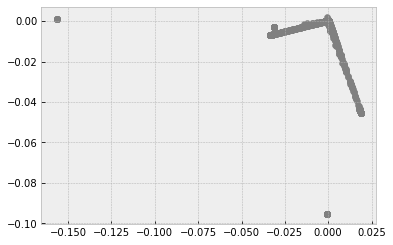

In [123]:
plt.scatter(proj_lle1250[:,[0]], proj_lle1250[:,1], c='gray', cmap=plt.cm.Spectral);

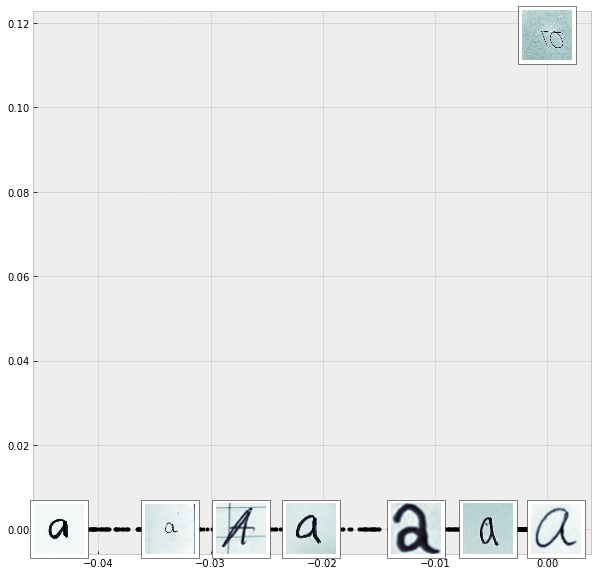

In [167]:
fig, ax = plt.subplots(figsize=(10,10))
model_LLE = LLE(n_components=2, n_neighbors=5)
plot_components(X_train, model_LLE, images=X_train,
               ax=ax, thumb_frac=0.05,cmap='bone')

Looking at the first two dimensions of LLE, the points are more sparse since LLE preserves the local intrinsic relationships. One of the main outliers seen is a 'a' character turned at a 90 degree angle which makes sense since it wouldn't be a local neighbor to the other characters. Moving down the Y axis, the characters go from a turned 90 degree angle to a normal orientation, which means the orientation carries alot of variance for LLE. The characters also seem to increase in thickness as you approach the middle of the x-axis, meaning that the thickness carries high variance for LLE.

### Part 3: Reduce dimensionality of feature space using MDS

In [171]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, max_iter=5)
# fit the data and transform it 
proj_mds2 = mds.fit_transform(X_train)
proj_mds2.shape

(6720, 2)

#### Build classifier using new lower dimensional space (MDS)

In [172]:
# Build classifier using new lower dimensional spcae
lr = LogisticRegression()
pipe_mds = Pipeline([('scaler', StandardScaler()),
               ('classifier', lr)])
pipe_mds

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [173]:
print("Accuracy score for Classifier on 2 dimensions: ")
pipe_mds.fit(proj_mds2, t_train)
pipe_mds.named_steps['classifier'].score(proj_mds2,t_train)

Accuracy score for Classifier on 2 dimensions: 


0.10714285714285714

In [179]:
proj_mds2_test = mds.fit_transform(X_test)

In [180]:
# Save reduced dimensional test set with MDS n_components=2
joblib.dump(proj_mds2_test, 'proj_2_mds_test_Q4');
# Save preprocessing pipeline for Part 4 MDS
joblib.dump(pipe_mds, 'pipe_Q4_mds');

#### Visualize first 2 dimensions of MDS

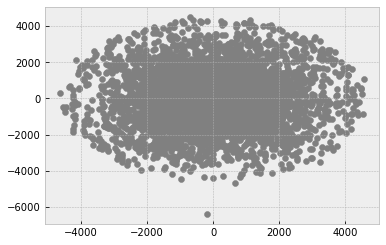

In [176]:
plt.scatter(proj_mds2[:,[0]], proj_mds2[:,1], c='gray', cmap=plt.cm.Spectral);

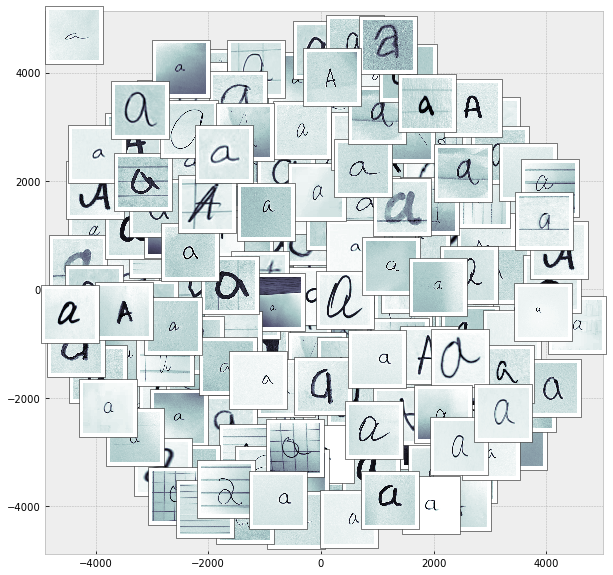

In [177]:
fig, ax = plt.subplots(figsize=(10,10))
model_MDS = MDS(n_components=2, max_iter=5,n_init=1)
plot_components(X_train, model_MDS, images=X_train,
               ax=ax, thumb_frac=0.05,cmap='bone')

Looking at the first two dimensions, MDS seems to unfold the data more than the other two manifold learning algorithms. Moving downwards along the Y axis, the images range from dark to light, meaning that the lightness of an image carries high variance and is an eigenvector for MDS. As you go down the Y-axis, he thickness of the characters decrease. Towards the middle of the X axis, the characters seem to get smaller in size and there are more apparent lines on the paper.

#### Problem 4 conclusion

Out of the three manifold learning algorithms used, I would pick ISOMAP since it is more computational efficient and has important features such as thickness, background, and lightness of the characters taken into account when applying variance. The accuracy scores for ISOMAP are also higher than the other manifold learning algorithms. Although, MDS is also a good choice since it unfold the data more effectively, but the accuracy scores are low compared to ISOMAP.